In [13]:
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_bloch_multivector ,plot_histogram
from numpy import pi
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit.primitives import BackendSamplerV2
import matplotlib.pyplot as plt

## Não violação da Desigualdade de Bell


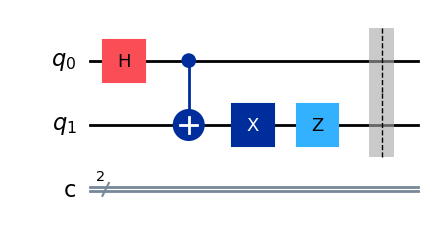

In [2]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
import numpy as np

qc = QuantumCircuit(2,2) 
qc.h(0) 
qc.cx(0,1) 
qc.x(1)
qc.z(1)

state = Statevector(qc)

qc.barrier()

qc.draw("mpl")

In [3]:
state.draw('latex', prefix="| \\psi\\rangle =")

<IPython.core.display.Latex object>

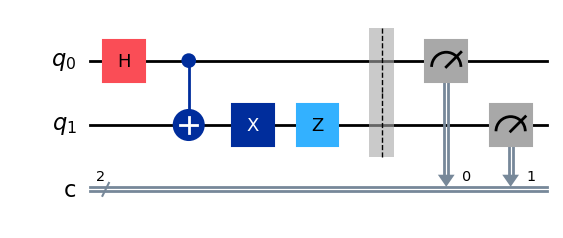

In [4]:
qc.measure([0,1],[0,1])
qc.draw("mpl")

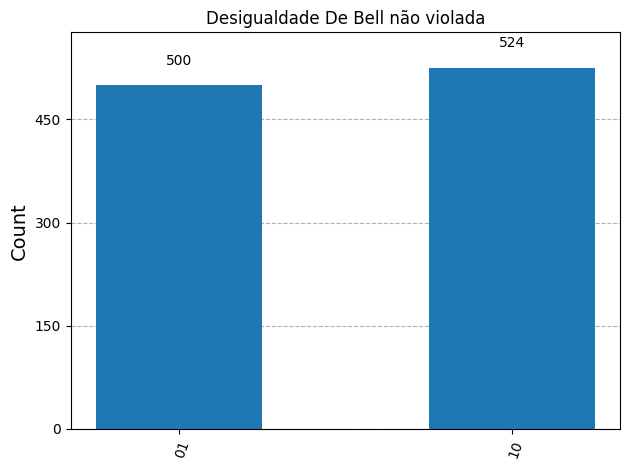

In [5]:
sim_ideal = AerSimulator()
result = sim_ideal.run(transpile(qc, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Desigualdade De Bell não violada')

---

## Violando a desigualdade de Bell

In [6]:
# Função para criar o circuito Bell com uma rotação específica
def create_bell_circuit(theta):
    rq = QuantumRegister(2)
    rc = ClassicalRegister(2)
    bell = QuantumCircuit(rq, rc)

    # Criação do estado de Bell
    bell.x([0,1])
    bell.h(0)
    bell.cx(0,1)

    # Aplicação da rotação no qubit 1
    bell.ry(theta, 1)

    # Barreira e medida
    bell.barrier()
    bell.measure([0,1], [0,1])

    return bell

In [7]:
# Diferentes ângulos de rotação
angles = [-2*pi/3, -4*pi/3, 2*pi/3, 4*pi/3]

In [8]:
circuits = [create_bell_circuit(theta) for theta in angles]

Circuito 1 com θ = -2.09 rad


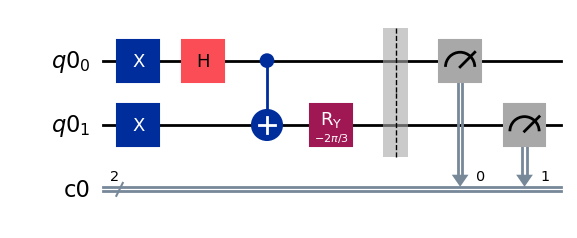

Circuito 2 com θ = -4.19 rad


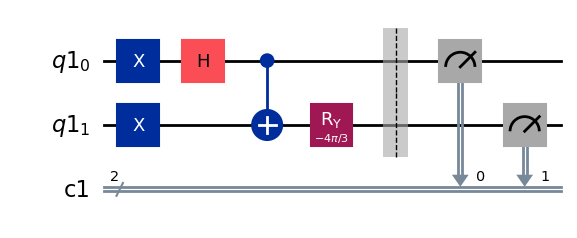

Circuito 3 com θ = 2.09 rad


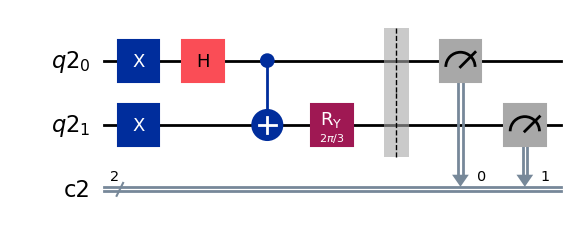

Circuito 4 com θ = 4.19 rad


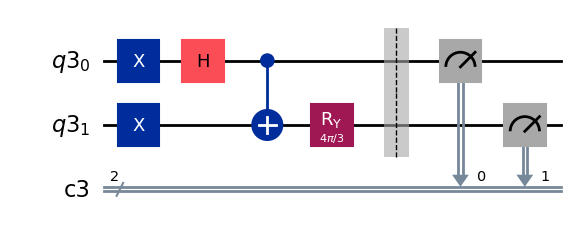

In [9]:
for i, circuit in enumerate(circuits):
    print(f'Circuito {i+1} com θ = {angles[i]:.2f} rad')
    display(circuit.draw('mpl'))

ValueError: A backend or session must be specified.

## Interpretação dos dados ?

| θ (rad) | "00" | "01" | "10" | "11" |
|---------|------|------|------|------|
| -2.09   | 364  | 143  | 141  | 376  |
| -4.19   | 387  | 114  | 158  | 365  |
| 2.09    | 382  | 116  | 141  | 385  |
| 4.19    | 381  | 120  | 112  | 411  |
